In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#converting into dataframe
df = pd.read_csv('SBI_Life_Insurance.csv')

In [3]:
df.shape

(1338, 8)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [7]:
df['smoker'].value_counts()


0    1064
1     274
Name: smoker, dtype: int64

In [8]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

### Imputing Missing Values with Medians

In [9]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

# 3. Exploratory Data Analysis Data Visualization

## A.Univariate analysis



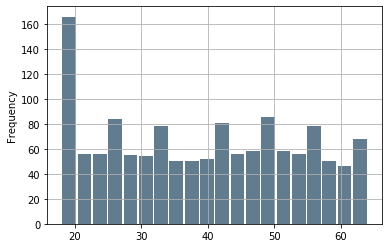

In [10]:
df['age'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

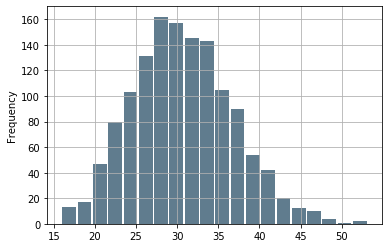

In [15]:
df['bmi'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

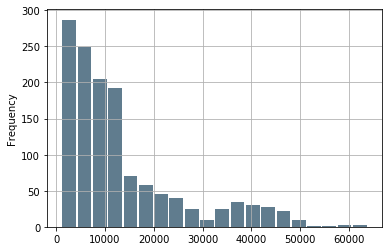

In [11]:
df['charges'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

## Applying transform to remove skewness

In [12]:
charges_transformed = np.log(df['charges']+ 1)
charges_transformed.describe()

count    1338.000000
mean        9.098828
std         0.919379
min         7.023647
25%         8.464064
50%         9.146658
75%         9.719618
max        11.063061
Name: charges, dtype: float64

In [13]:
df['charges']=charges_transformed

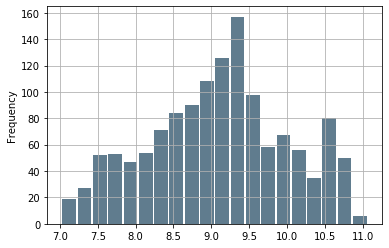

In [14]:
df['charges'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

## B. Bivariate Analysis

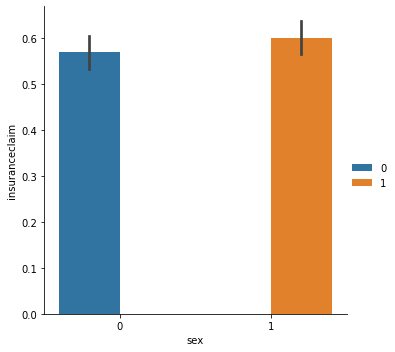

In [19]:
sns.catplot(x="sex", y="insuranceclaim",hue="sex", kind="bar", data=df)\
             .add_legend();

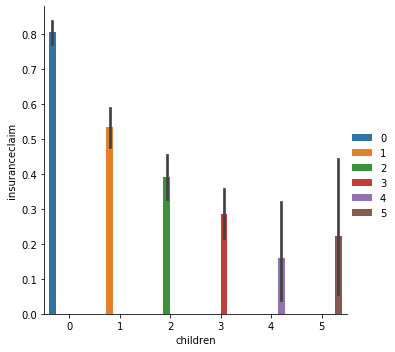

In [20]:
sns.catplot(x="children", y="insuranceclaim",hue="children", kind="bar", data=df)\
             .add_legend();

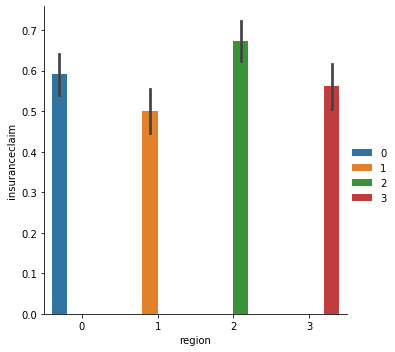

In [21]:
sns.catplot(x="region", y="insuranceclaim",hue="region", kind="bar", data=df)\
             .add_legend();

## C. Multivariate Analysis

Scatter plot with color encoding:


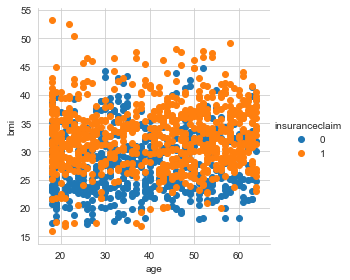

In [24]:
print('Scatter plot with color encoding:')
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='insuranceclaim',height=4)\
   .map(plt.scatter,'age','bmi')\
   .add_legend();
plt.show();
plt.close();

Scatter plot with color encoding:


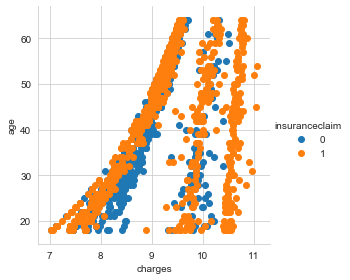

In [15]:
print('Scatter plot with color encoding:')
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='insuranceclaim',height=4)\
   .map(plt.scatter,'charges','age')\
   .add_legend();
plt.show();
plt.close();

Summary :<br>
If the charges are greater than 35000 ther is high chance of insurnace to be claim

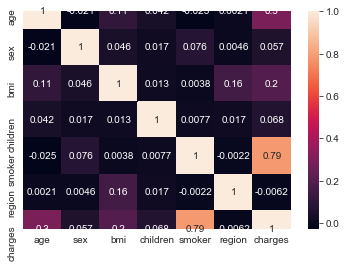

In [32]:
# as its a regression problem so drawing co-relation matrix is better than drawing pair plot
corr=df.drop(['insuranceclaim'],axis=1).corr()
sns.heatmap(corr, annot=True)

Summary:<br>
1.Charges are highly co-related to smoker feature implies that if the person is smoker he has to pay more charges to claim the insurance

# 4. Data pre-processing and cleaning

## A.Converting all features to numerical features 

In [132]:
# all features are al=ready numeric

In [133]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

## B.Removing Outliers

In [16]:
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
        932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
      dtype=int64), array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
      dtype=int64))


## B. Normalize all features

In [17]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(df.drop(['insuranceclaim'],axis=1))
df_tran=normalizer.transform(df.drop(['insuranceclaim'],axis=1))

In [18]:
df1 = pd.DataFrame(df_tran,columns=df.drop(['insuranceclaim'],axis=1).columns)

In [19]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,0.538660,0.000000,0.790979,0.000000,0.028351,0.085052,0.275971
1,0.460786,0.025599,0.864485,0.025599,0.000000,0.051198,0.190813
2,0.632847,0.022602,0.745856,0.067805,0.000000,0.045203,0.189871
3,0.798847,0.024207,0.549631,0.000000,0.000000,0.024207,0.242030
4,0.728725,0.022773,0.657675,0.000000,0.000000,0.022773,0.188113


## D. Train_Test split

In [20]:
df['insuranceclaim'].value_counts()

1    775
0    541
Name: insuranceclaim, dtype: int64

In [21]:
y=df['insuranceclaim']
x=df1

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [23]:
X_train

,age,sex,bmi,children,smoker,region,charges
3,0.798847,0.024207,0.549631,0.000000,0.000000,0.024207,0.242030
111,0.497953,0.000000,0.846994,0.000000,0.000000,0.023712,0.184613
727,0.680039,0.000000,0.705586,0.000000,0.018379,0.036759,0.194952
1157,0.892990,0.000000,0.414382,0.017173,0.017173,0.017173,0.173123
828,0.882669,0.000000,0.446221,0.000000,0.000000,0.000000,0.147592
...,...,...,...,...,...,...,...
1095,0.863765,0.000000,0.465174,0.053985,0.017995,0.035990,0.181631
1130,0.765227,0.018220,0.621292,0.000000,0.000000,0.054659,0.158444
1294,0.516502,0.028695,0.812343,0.028695,0.000000,0.000000,0.267726
860,0.800413,0.016008,0.579499,0.000000,0.000000,0.048025,0.144762


# 5. Building Models

# Model1 : KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [25]:
clf.best_params_

{'n_neighbors': 11}

In [26]:
from sklearn.model_selection import cross_val_score
k_range = range(1,100,10)
k_scores = []


for k in k_range:
  
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.8013487255350874, 0.7776124769586605, 0.7345063870005752, 0.7286965939910535, 0.7070531447759267, 0.7026359585784229, 0.7014476418583353, 0.6945783875171709, 0.6900587627534547, 0.6798564392471793]


Text(0, 0.5, 'Cross-Validated Accuracy')

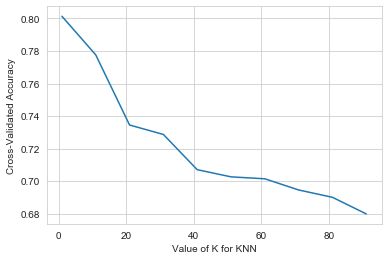

In [27]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

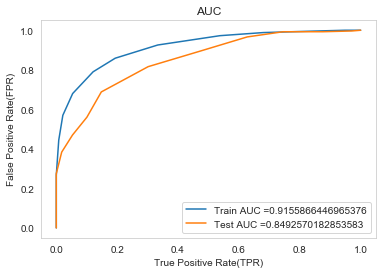

In [28]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict_proba(X_train)  
y_test_pred = neigh.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [29]:
y_pred=neigh.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       169
           1       0.81      0.82      0.81       266

    accuracy                           0.77       435
   macro avg       0.76      0.76      0.76       435
weighted avg       0.77      0.77      0.77       435

0.7701149425287356


## Confusion Matrix

In [30]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [31]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[ 89  80]
 [ 28 238]]


In [32]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

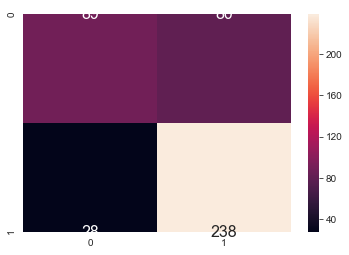

In [33]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 2 : Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()

parameters = {'alpha': range(1,100,10)}

clf = GridSearchCV(mnb, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={'alpha': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [35]:
clf.best_params_

{'alpha': 1}

In [36]:
from sklearn.model_selection import cross_val_score
alpha = range(1,100,10)
k_scores = []


for k in alpha:
  
    mnb = MultinomialNB(alpha=k)
    
    scores = cross_val_score(mnb,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.577759824122668, 0.577759824122668, 0.577759824122668, 0.577759824122668, 0.577759824122668, 0.577759824122668, 0.577759824122668, 0.577759824122668, 0.577759824122668, 0.577759824122668]


Text(0, 0.5, 'Cross-Validated Accuracy')

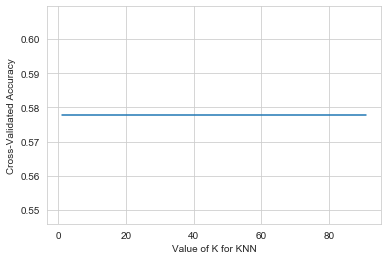

In [37]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(alpha, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

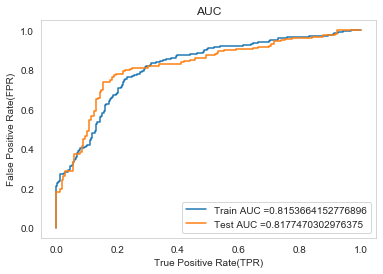

In [38]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)

y_train_pred = mnb.predict_proba(X_train)  
y_test_pred = mnb.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [39]:
y_pred=mnb.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       169
           1       0.61      1.00      0.76       266

    accuracy                           0.61       435
   macro avg       0.31      0.50      0.38       435
weighted avg       0.37      0.61      0.46       435

0.6114942528735632


## Confusion Matrix

In [40]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [41]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[152  17]
 [135 131]]


In [42]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

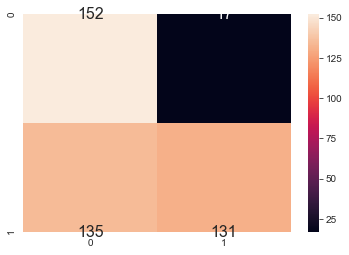

In [43]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Logistic Regression 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9287132686904536


In [45]:
model.best_params_

{'C': 10000}

In [46]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    Lr = LogisticRegression(C=k)
    
    scores = cross_val_score(Lr,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.577759824122668, 0.577759824122668, 0.6105742136592582, 0.7991009474833575, 0.8752399528019442]


In [47]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

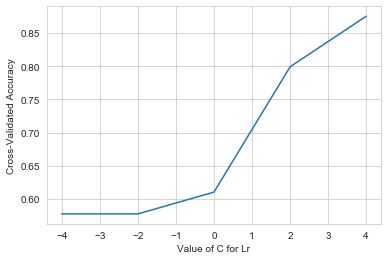

In [48]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

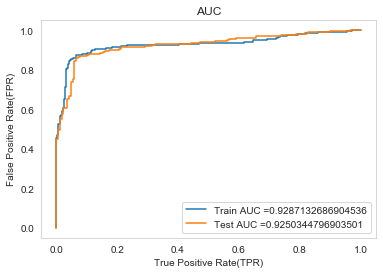

In [49]:
from sklearn.metrics import roc_curve, auc

Lr = LogisticRegression(C=10000)
Lr.fit(X_train, y_train)

y_train_pred = Lr.predict_proba(X_train)  
y_test_pred = Lr.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [168]:
y_pred=Lr.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55       168
           1       0.71      0.79      0.75       264

    accuracy                           0.68       432
   macro avg       0.66      0.65      0.65       432
weighted avg       0.67      0.68      0.67       432

0.6782407407407407


## Confusion Matrix

In [169]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [170]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[138  30]
 [133 131]]


In [171]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

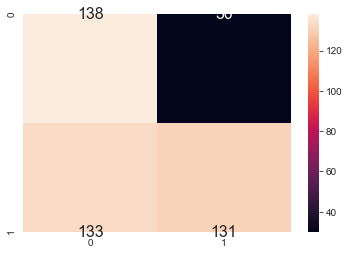

In [172]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Linear regression 

In [48]:
# we can't use linear regression as its a pure regression model 


# Model 4 : SVM

In [50]:
from sklearn.svm import SVC

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVC(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
0.9415467815873417


In [51]:
model.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [52]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVC(C=k,gamma= 1,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.577759824122668, 0.577759824122668, 0.6287821551430619, 0.8638368379650828, 0.8819426344029212]


In [53]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

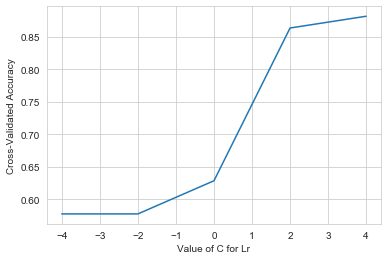

In [54]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

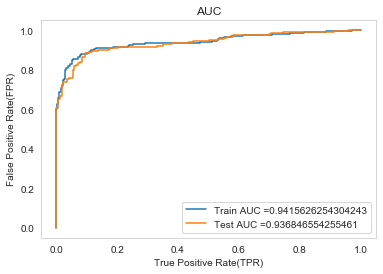

In [55]:
from sklearn.svm import SVC

svm = SVC(C=1000,gamma=1,kernel= 'rbf',probability=True)

svm.fit(X_train, y_train)


y_train_pred = svm.predict_proba(X_train)  
y_test_pred = svm.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [56]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       169
           1       0.93      0.89      0.91       266

    accuracy                           0.89       435
   macro avg       0.88      0.89      0.89       435
weighted avg       0.89      0.89      0.89       435

0.8919540229885058


## Confusion Matrix

In [57]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [58]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[143  26]
 [ 26 240]]


In [59]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

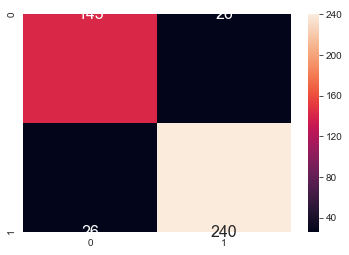

In [60]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 5 : Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
#min_samples_split :The minimum number of samples required to split an internal node, if less than this number can't split

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}

clf = DecisionTreeClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [62]:
model.best_params_

{'max_depth': 10, 'min_samples_split': 10}

In [63]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeClassifier(max_depth=k, min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.7161179305648504, 0.7979265729750037, 0.7990498749603747, 0.7990498749603747]


Text(0, 0.5, 'Cross-Validated Accuracy')

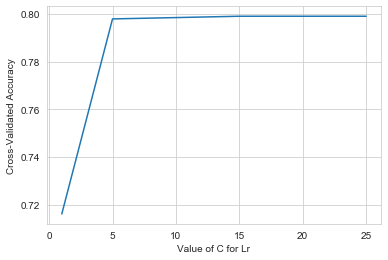

In [64]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

# Tried without hyperparameters

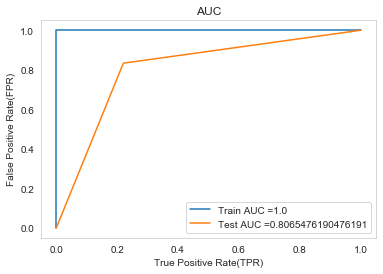

In [188]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

## Overfitting on train data as we are training very deep trees 

# Traning with best hyperparameters

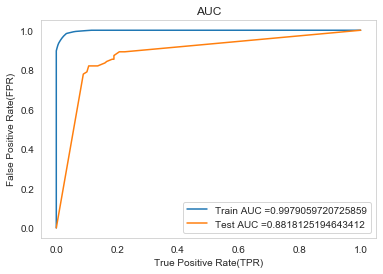

In [65]:
DT = DecisionTreeClassifier(max_depth=10,min_samples_split=10)

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [66]:
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       169
           1       0.88      0.85      0.87       266

    accuracy                           0.84       435
   macro avg       0.83      0.83      0.83       435
weighted avg       0.84      0.84      0.84       435

0.8390804597701149


## Confusion Matrix

In [67]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [68]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[134  35]
 [ 29 237]]


In [69]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

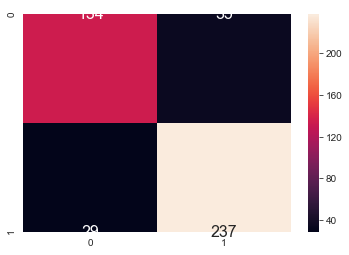

In [70]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

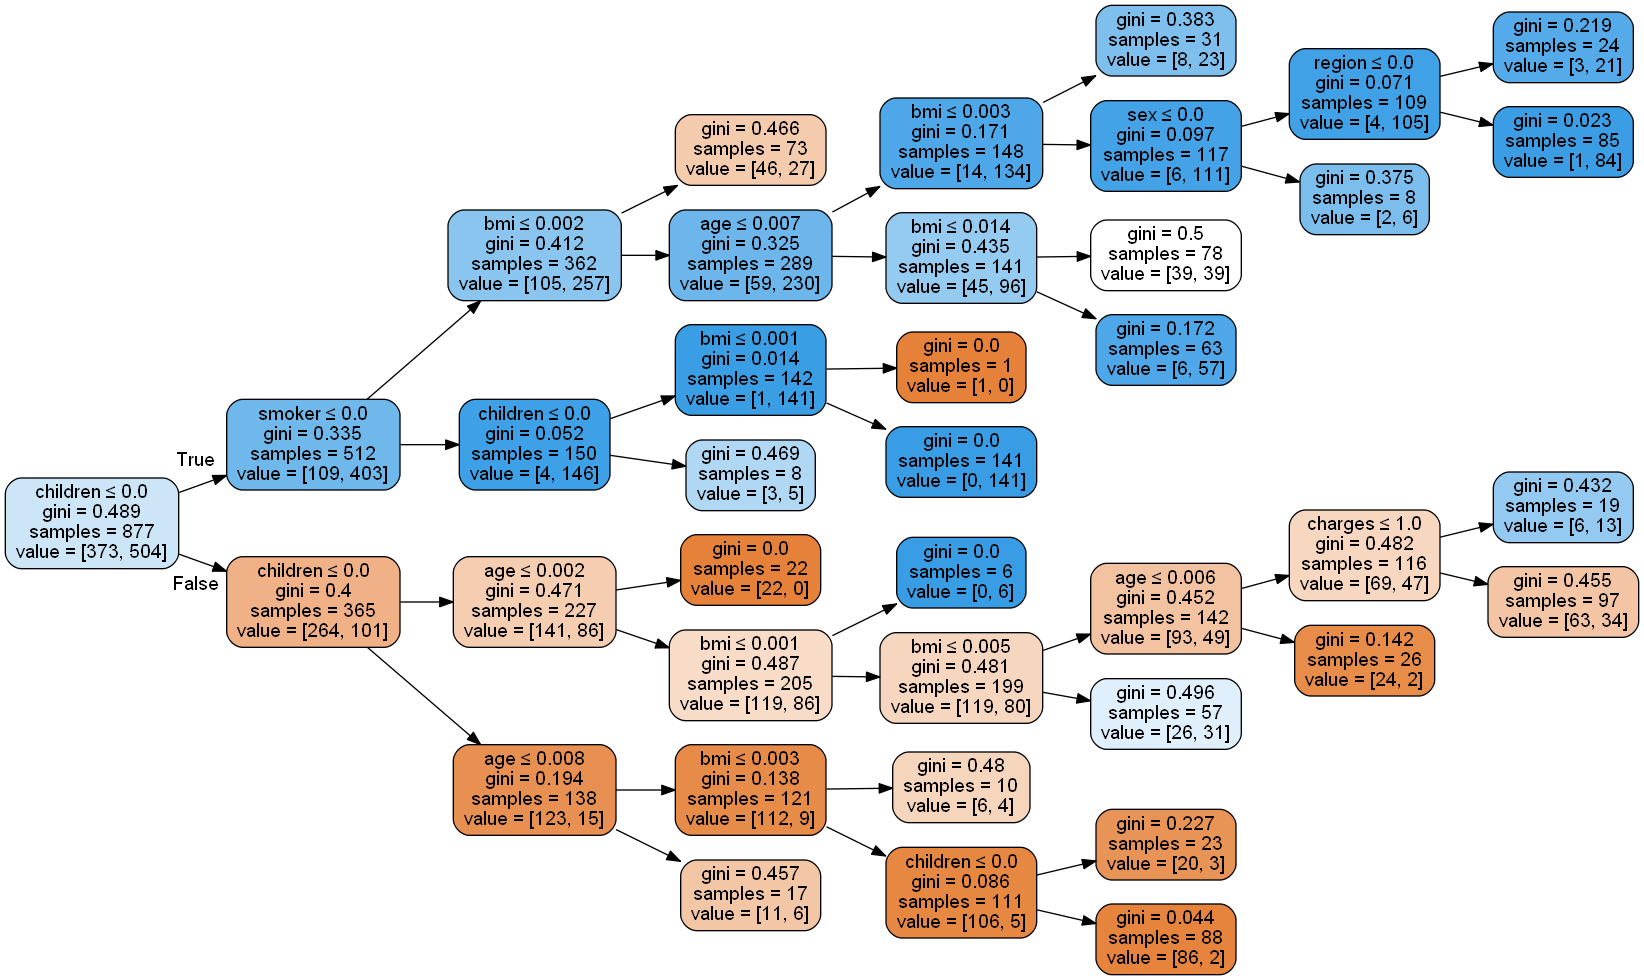

In [195]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(DT, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [71]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = RandomForestClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
1.0


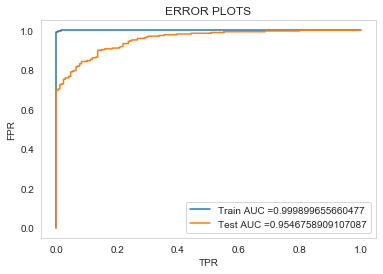

In [72]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(max_depth=10,n_estimators=50,class_weight='balanced')
RF.fit(X_train, y_train)


y_train_pred =  RF.predict_proba(X_train)[:,1]      
y_test_pred =  RF.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Classification Report

In [73]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       169
           1       0.92      0.86      0.89       266

    accuracy                           0.87       435
   macro avg       0.86      0.87      0.86       435
weighted avg       0.87      0.87      0.87       435

0.8666666666666667


## Confusion Matrix

In [74]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

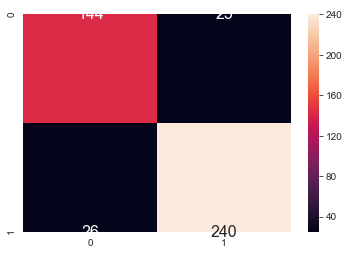

In [75]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Boosting

In [76]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.9439871869021667


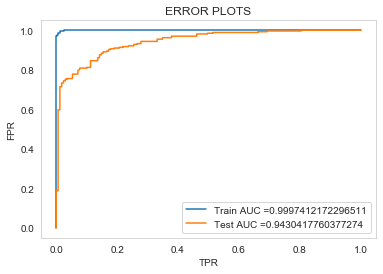

In [77]:
from sklearn.model_selection import GridSearchCV

GBDT=GradientBoostingClassifier(max_depth=5,n_estimators=50)
GBDT.fit(X_train, y_train)


y_train_pred =  GBDT.predict_proba(X_train)[:,1]      
y_test_pred =  GBDT.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [78]:
y_pred=GBDT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       169
           1       0.90      0.88      0.89       266

    accuracy                           0.87       435
   macro avg       0.86      0.86      0.86       435
weighted avg       0.87      0.87      0.87       435

0.8666666666666667


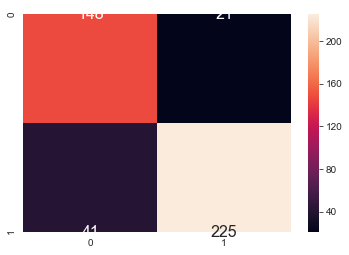

In [79]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Stacking

## Note: As we have very less data stascking is not advisable 

## Tried using SGDclassifier with different types of loss 

In [80]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [81]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(X_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_train, y_train)
#print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(X_train, y_train)
#print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(X_train, y_train)
#print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(X_test))))
    log_error =log_loss(y_test, sclf.predict_proba(X_test))
    if best_alpha > log_error:
        best_alpha = log_error

--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.690
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.670
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.598
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.505
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.467
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.456


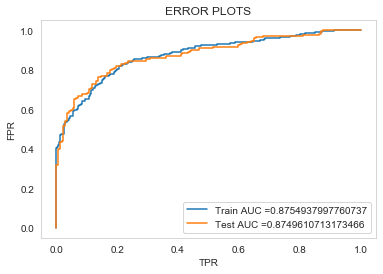

In [82]:
lr = LogisticRegression(C=10)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_train, y_train)


y_train_pred =  sclf.predict_proba(X_train)[:,1]      
y_test_pred =  sclf.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

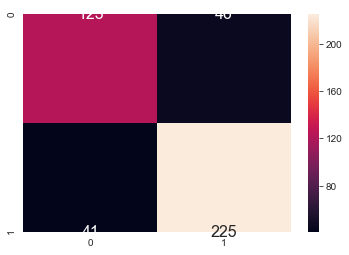

In [83]:
## Confusion Matrix

def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

[17:29:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


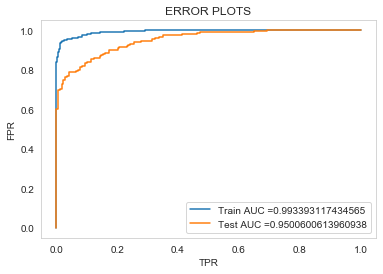

In [84]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_train_pred =  xgb_model.predict(X_train)      
y_test_pred =  xgb_model.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# 6.Model Comparison

In [86]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Sr.No","Model", "Accuracy", "AUC"]

#setting row values
table.add_row(['1',"KNN", '84.92','77.01' ])
table.add_row(['2',"Naive Bayes",'81.77' ,'61.44' ])
table.add_row(['3',"Logistic Regression", '92.50','67.83' ])
table.add_row(['4',"SVM", '93.68','89.19' ])
table.add_row(['5',"Decision Tree",'88.18' ,'83.90' ])
table.add_row(['6',"RandomForest",'95.46' ,'86.66' ])
table.add_row(['7',"GBDT",'94.36' ,'86.67' ])
table.add_row(['8',"Xgboost",'--' ,'95.00' ])
table.add_row(['9',"Stacking", '--','87.50' ])
print(table)

+-------+---------------------+----------+-------+
| Sr.No |        Model        | Accuracy |  AUC  |
+-------+---------------------+----------+-------+
|   1   |         KNN         |  84.92   | 77.01 |
|   2   |     Naive Bayes     |  81.77   | 61.44 |
|   3   | Logistic Regression |  92.50   | 67.83 |
|   4   |         SVM         |  93.68   | 89.19 |
|   5   |    Decision Tree    |  88.18   | 83.90 |
|   6   |     RandomForest    |  95.46   | 86.66 |
|   7   |         GBDT        |  94.36   | 86.67 |
|   8   |       Xgboost       |    --    | 95.00 |
|   9   |       Stacking      |    --    | 87.50 |
+-------+---------------------+----------+-------+


Summary:<br>
1.XGboost is the best model amongst all with AUC of 95.00<br>
2.If we want more interpretability we cant XGboost is not more interpretable, so we go for SVM <br>
2.As the data is imbalanced the accuracy score is affected.<br>
3.Ensembles like Xgboost ,staking , GBDT doesn't perform very well due to very less amount of data

# 7.Creating Submission File

In [88]:
best_model=svm
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']